
## **Problematic : Uncertainty in LCA via Monte Carlo**
### **Task**
Calculate a range of carbon values for taking a shower (calculating the carbon for the "Use Phase")

"In a monte carlo analysis, you will assign probability distributions to key variables in an objective function or outcome function."

**The equation for carbon from a shower = ((Shower length * Flow Rate) * (EF for Water + (Heat Energy Per Liter * Emission Factor for Heat Energy))**

**Variables :**
1. Shower Length (in minutes) = 10 minutes , Lognormal (mean = 10, sigma = 3)
2. 0EF for Water (Emission Factor for Water) = The carbon emissions associated with supplying water, per liter. (kg CO₂ per liter (or g CO₂ per liter))
3. Emission Factor for Heat Energy (The carbon emissions per unit of energy used to heat the water) = Multinomial distribution provided by the proportions in table below


**Fixed Values**
1. Flow Rate = 2.5 gallons/minute, FIXED
2. Heat Energy per Liter (The amount of energy required to heat one liter of water to shower temperature) = 0.144 MJ, FIXED
If the shower is cold, this value ≈ 0.



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
EF_water = pd.read_csv("/content/EF_for_water - Sheet1.csv")
Heat_energy = pd.read_csv("/content/Heat_energy_emission - Sheet1.csv")

In [ ]:
EF_water

,Water_type,ecoinvent-v3.5 Dataset,Amount (MJ),Unit,Comment,Proportion,CO2,GEO
0,"tap water production, underground water with d...","tap water production, underground water with d...",NaN,kg,NaN,14.29%,0.000136,Europe without Switzerland (Europe without Swi...
1,"tap water production, underground water with c...","tap water production, underground water with c...",NaN,kg,NaN,14.29%,0.000297,Europe without Switzerland (Europe without Swi...
2,"tap water production, underground water withou...","tap water production, underground water withou...",NaN,kg,NaN,14.29%,0.000014,Switzerland (CH)
3,"tap water production, conventional treatment","tap water production, conventional treatment",NaN,kg,NaN,14.29%,0.000218,Europe without Switzerland (Europe without Swi...
4,"tap water production, microstrainer treatment","tap water production, microstrainer treatment",NaN,kg,NaN,14.29%,0.000376,Rest-of-World (RoW)
5,"tap water production, conventional with biolog...","tap water production, conventional with biolog...",NaN,kg,NaN,14.29%,0.000288,Europe without Switzerland (Europe without Swi...
6,"tap water production, seawater reverse osmosis...","tap water production, seawater reverse osmosis...",NaN,kg,NaN,14.29%,0.005770,Global (GLO)


In [ ]:
Heat_energy

,\n \nHeat_type,Unnamed: 1,ecoinvent-v3.5 Dataset,Amount (MJ),Unit,Comment,Proportion,CO2,GEO
0,"Heat, for warm water heating, Zurich, Switzerland",NaN,NaN,1.0000,MJ,NaN,NaN,NaN,NaN
1,"Input, energy",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Heat, central or small-scale, natural gas {CH}",NaN,"Heat production, natural gas, at boiler conden...",0.4990,MJ,Share of gas heating,38.55%,0.074034,Europe without Switzerland (Europe without Swi...
3,"Heat, central or small-scale, other than natur...",NaN,"Heat production, light fuel oil, at boiler 10k...",0.2720,MJ,Share of oil heating,21.02%,0.104351,Europe without Switzerland (Europe without Swi...
4,"Heat, district or industrial, other than natur...",NaN,Heat from municipal waste incineration to gene...,0.1580,MJ,Share of district heating,12.21%,0.000260,Switzerland (CH)
5,"Heat, borehole heat pump {CH}",NaN,"Heat production, borehole heat exchanger, brin...",0.0598,MJ,Share from heat pumps,4.62%,0.029317,Europe without Switzerland (Europe without Swi...
6,"Heat, central or small-scale, other than natur...",NaN,"Heat production, softwood chips from forest, a...",0.0095,MJ,Share from wood heating,0.73%,0.006018,Switzerland (CH)
7,"Heat, central or small-scale, other than natur...",NaN,"Operation, solar collector system, Cu flat pla...",0.0480,MJ,Share from solar thermal,3.71%,0.002794,Switzerland (CH)
8,"Electricity, low voltage, Zurich, Switzerland",NaN,NaN,0.2480,MJ,Share from electricity,19.16%,0.033284,Switzerland (CH)


### Data Exploration / simulation

#### Shower duration

In [ ]:
import numpy as np
n_sim = 1000

# Given values
E = 10      # Expected value / mean E(X)
Var = 3**2   # Variance Var(X) = sigma **2
# Compute sigma^2 and sigma
sigma2 = np.log(1 + Var / (E**2))
sigma = np.sqrt(sigma2)

# Compute mu
mu = np.log(E) - 0.5 * sigma2
print(mu, sigma)
shower_length = np.random.lognormal(mu, sigma, size=n_sim)


2.2594962448735196 0.293560379208524


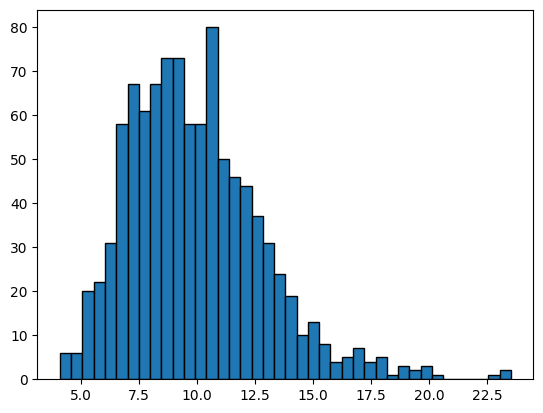

In [ ]:
 # minutes
plt.hist(shower_length, bins=40,edgecolor= 'black' )
plt.show()

### EF_water variable

For our monte-Carlo simulations there are some columns / variables that we will not be using like ecoinvent-3.5 and also the empty columns


In [ ]:
EF_water2 = EF_water.drop(columns=["ecoinvent-v3.5 Dataset", "Amount (MJ)", "Unit","Comment"])
EF_water2

,Water_type,Proportion,CO2,GEO
0,"tap water production, underground water with d...",14.29%,0.000136,Europe without Switzerland (Europe without Swi...
1,"tap water production, underground water with c...",14.29%,0.000297,Europe without Switzerland (Europe without Swi...
2,"tap water production, underground water withou...",14.29%,0.000014,Switzerland (CH)
3,"tap water production, conventional treatment",14.29%,0.000218,Europe without Switzerland (Europe without Swi...
4,"tap water production, microstrainer treatment",14.29%,0.000376,Rest-of-World (RoW)
5,"tap water production, conventional with biolog...",14.29%,0.000288,Europe without Switzerland (Europe without Swi...
6,"tap water production, seawater reverse osmosis...",14.29%,0.005770,Global (GLO)


In [ ]:
Heat_energy2 = Heat_energy.drop(columns=["Unnamed: 1","ecoinvent-v3.5 Dataset", "Unit","Amount (MJ)"])
Heat_energy2.columns = Heat_energy2.columns.str.replace('\n', '', regex=False).str.strip()
Heat_energy2 = Heat_energy2.iloc[2:].reset_index(drop=True)
Heat_energy2

,Heat_type,Comment,Proportion,CO2,GEO
0,"Heat, central or small-scale, natural gas {CH}",Share of gas heating,38.55%,0.074034,Europe without Switzerland (Europe without Swi...
1,"Heat, central or small-scale, other than natur...",Share of oil heating,21.02%,0.104351,Europe without Switzerland (Europe without Swi...
2,"Heat, district or industrial, other than natur...",Share of district heating,12.21%,0.000260,Switzerland (CH)
3,"Heat, borehole heat pump {CH}",Share from heat pumps,4.62%,0.029317,Europe without Switzerland (Europe without Swi...
4,"Heat, central or small-scale, other than natur...",Share from wood heating,0.73%,0.006018,Switzerland (CH)
5,"Heat, central or small-scale, other than natur...",Share from solar thermal,3.71%,0.002794,Switzerland (CH)
6,"Electricity, low voltage, Zurich, Switzerland",Share from electricity,19.16%,0.033284,Switzerland (CH)


**==> If we randomly take 1 liter of tap water, there is the same probability (14.29%) that it originates from any of the listed water production pathways**

/tmp/ipython-input-2882541415.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(pathways))


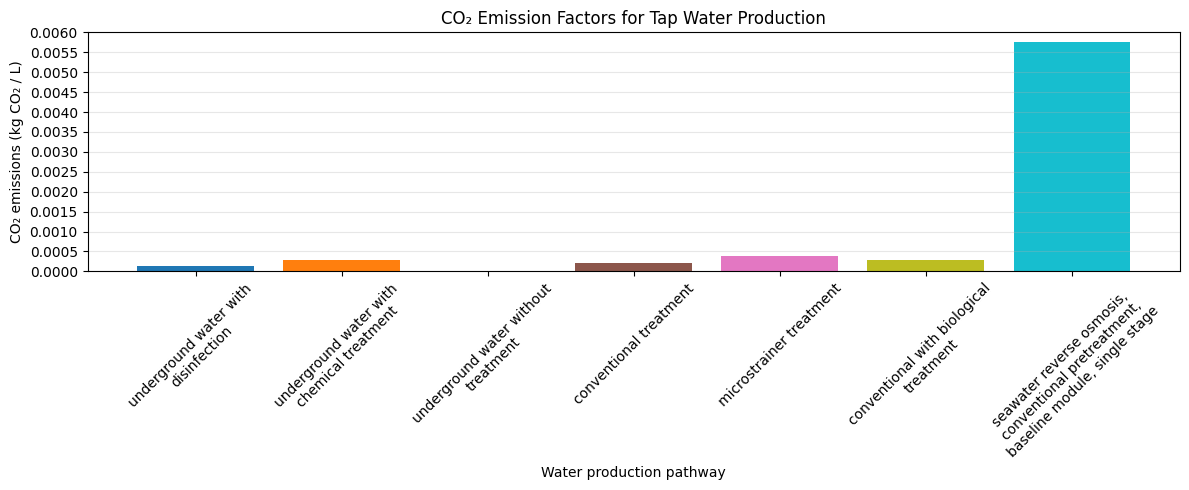

In [ ]:
import matplotlib.pyplot as plt
import textwrap
import numpy as np

# ---------- Prepare labels ----------
x_labels_raw = (
    EF_water2["Water_type"]
      .str.split(",", n=1)
      .str[1]
      .str.strip()
)
x_labels = [textwrap.fill(label, width=30) for label in x_labels_raw]

df = EF_water2.copy()
df["x_label"] = x_labels
df["GEO"] = df["GEO"].astype(str)

# ---------- Color mapping by water pathway ----------
pathways = df["x_label"].unique()
cmap = plt.cm.get_cmap("tab10", len(pathways))
pathway_colors = {p: cmap(i) for i, p in enumerate(pathways)}

# ---------- Single plot (no GEO facets) ----------
fig, ax = plt.subplots(figsize=(12, 5))

yticks = np.arange(0, 0.0065, 0.0005)
ymax = 0.006

ax.bar(
    df["x_label"],
    df["CO2"],
    color=[pathway_colors[p] for p in df["x_label"]]
)

ax.set_xlabel("Water production pathway")
ax.grid(axis="y", alpha=0.3)
ax.set_ylim(0, ymax)
ax.set_yticks(yticks)
ax.set_yticklabels([f"{y:.4f}" for y in yticks])

ax.tick_params(axis="x", rotation=45)
for label in ax.get_xticklabels():
    label.set_ha("center")

ax.set_ylabel("CO₂ emissions (kg CO₂ / L)")
ax.set_title("CO₂ Emission Factors for Tap Water Production")

plt.tight_layout()
plt.show()


/tmp/ipython-input-835792541.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(labels_all))


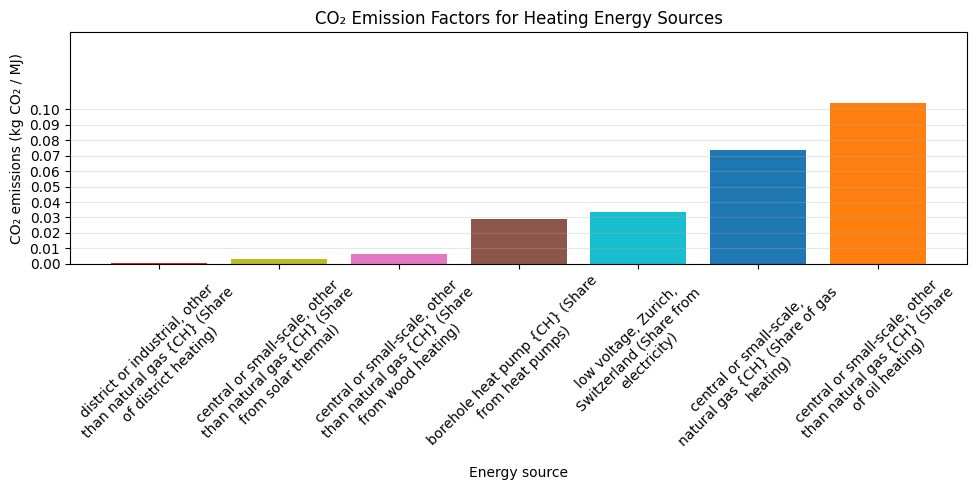

In [ ]:
import matplotlib.pyplot as plt
import textwrap
import numpy as np

df = Heat_energy2.copy()
df["GEO"] = df["GEO"].astype(str)

# ---------- Build labels: Heat_type (Comment) ----------
heat_short = (
    df["Heat_type"]
      .astype(str)
      .str.split(",", n=1)
      .str[1]
      .fillna(df["Heat_type"].astype(str))
      .str.strip()
)

comment = df["Comment"].astype(str).fillna("").str.strip()

df["label_raw"] = np.where(
    comment.eq("") | comment.eq("nan"),
    heat_short,
    heat_short + " (" + comment + ")"
)

# Wrap labels
df["x_label"] = df["label_raw"].apply(lambda s: textwrap.fill(s, width=30))

# ---------- Color mapping by label ----------
labels_all = df["x_label"].unique()
cmap = plt.cm.get_cmap("tab10", len(labels_all))
label_to_color = {lab: cmap(i) for i, lab in enumerate(labels_all)}

# ---------- Single plot (no GEO facets) ----------
fig, ax = plt.subplots(figsize=(10, 5))

# Optional: stable order (same logic you used)
df_plot = df.sort_values("CO2", ascending=True)

yticks = np.arange(0, 0.11, 0.01)
ymax = 0.15

ax.bar(
    df_plot["x_label"],
    df_plot["CO2"],
    color=[label_to_color[x] for x in df_plot["x_label"]]
)

ax.set_xlabel("Energy source")
ax.set_ylabel("CO₂ emissions (kg CO₂ / MJ)")
ax.grid(axis="y", alpha=0.3)

ax.set_ylim(0, ymax)
ax.set_yticks(yticks)
ax.set_yticklabels([f"{y:.2f}" for y in yticks])

ax.tick_params(axis="x", rotation=45)
for t in ax.get_xticklabels():
    t.set_ha("center")

ax.set_title("CO₂ Emission Factors for Heating Energy Sources")

plt.tight_layout()
plt.show()


In [ ]:
heat = Heat_energy2.copy()

heat_probs = heat["Proportion"].astype(str).str.rstrip("%").astype(float)
heat_probs = heat_probs / heat_probs.sum()

heat_idx = np.random.choice(
    heat.index.values,     # choose among row IDs
    size=n_sim,
    p=heat_probs.values
)

sampled_heat = heat.loc[heat_idx, ["Heat_type", "Comment", "CO2"]]
sampled_heat.head()


,Heat_type,Comment,CO2
6,"Electricity, low voltage, Zurich, Switzerland",Share from electricity,0.033284
0,"Heat, central or small-scale, natural gas {CH}",Share of gas heating,0.074034
0,"Heat, central or small-scale, natural gas {CH}",Share of gas heating,0.074034
1,"Heat, central or small-scale, other than natur...",Share of oil heating,0.104351
1,"Heat, central or small-scale, other than natur...",Share of oil heating,0.104351


In [ ]:
sampled_heat["Heat_type"].value_counts()

,count
Heat_type,
"Heat, central or small-scale, natural gas {CH}",386
"Heat, central or small-scale, other than natural gas {CH}",259
"Electricity, low voltage, Zurich, Switzerland",181
"Heat, district or industrial, other than natural gas {CH}",117
"Heat, borehole heat pump {CH}",57


In [ ]:
 heat.index.values

array([0, 1, 2, 3, 4, 5, 6])

In [ ]:
water = EF_water2.copy()

water_probs = water["Proportion"].astype(str).str.rstrip("%").astype(float)
water_probs = water_probs / water_probs.sum()

print(water_probs)

water_idx = np.random.choice(
    water.index.values,     # choose among row IDs
    size=n_sim,
    p=water_probs.values
)

sampled_water = water.loc[water_idx, ["Water_type", "CO2"]]
sampled_water.head()



0    0.142857
1    0.142857
2    0.142857
3    0.142857
4    0.142857
5    0.142857
6    0.142857
Name: Proportion, dtype: float64


,Water_type,CO2
0,"tap water production, underground water with d...",0.000136
2,"tap water production, underground water withou...",0.000014
3,"tap water production, conventional treatment",0.000218
5,"tap water production, conventional with biolog...",0.000288
0,"tap water production, underground water with d...",0.000136


In [ ]:
sampled_water["Water_type"].value_counts()

,count
Water_type,
"tap water production, conventional treatment",170
"tap water production, seawater reverse osmosis, conventional pretreatment, baseline module, single stage",152
"tap water production, underground water with disinfection",145
"tap water production, underground water with chemical treatment",145
"tap water production, microstrainer treatment",145
"tap water production, underground water without treatment",123
"tap water production, conventional with biological treatment",120


In [ ]:
 water.index.values

array([0, 1, 2, 3, 4, 5, 6])

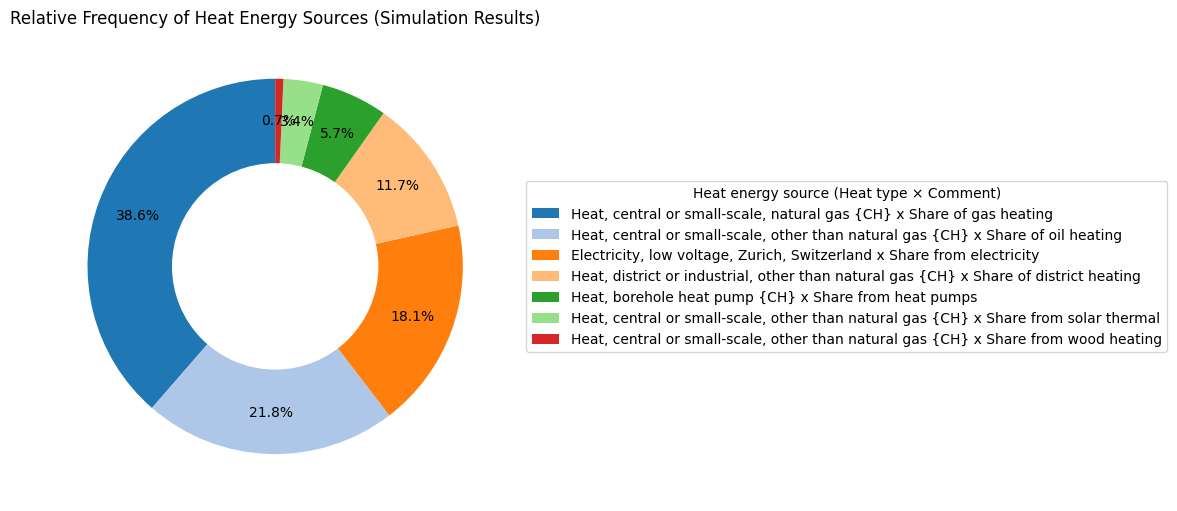

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 1) Build the heat energy source label = Heat_type x Comment
sampled_heat["Heat_source"] = (
    sampled_heat["Heat_type"].astype(str)
    + " x "
    + sampled_heat["Comment"].astype(str)
)

# 2) Count occurrences and convert to percentages
heat_counts = sampled_heat["Heat_source"].value_counts()
heat_freq_pct = heat_counts / heat_counts.sum() * 100

# 3) Plot donut chart
fig, ax = plt.subplots(figsize=(10, 6))

colors = plt.cm.tab20.colors[:len(heat_freq_pct)]

wedges, texts, autotexts = ax.pie(
    heat_freq_pct.values,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    pctdistance=0.78
)

# Donut hole
centre_circle = plt.Circle((0, 0), 0.55, fc="white")
ax.add_artist(centre_circle)

ax.set_title("Relative Frequency of Heat Energy Sources (Simulation Results)")

# Legend
ax.legend(
    wedges,
    heat_freq_pct.index,
    title="Heat energy source (Heat type × Comment)",
    loc="center left",
    bbox_to_anchor=(1.02, 0.5)
)

plt.tight_layout()
plt.show()


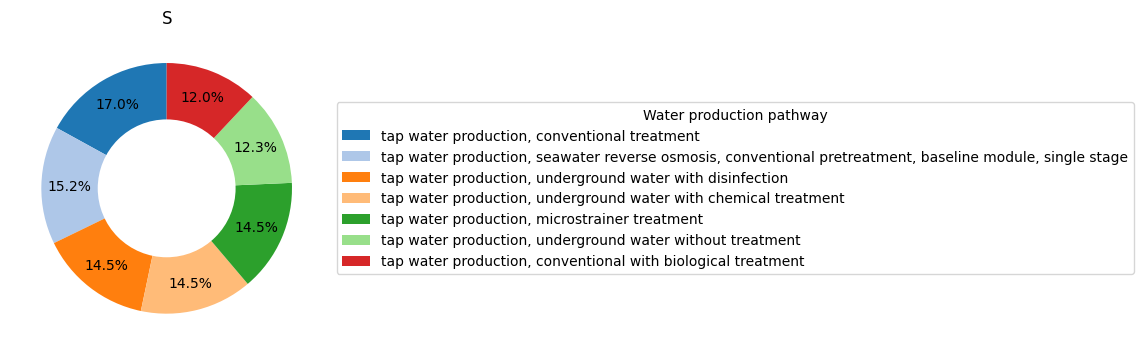

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 1) Use Water_type directly as the category
sampled_water["Water_source"] = sampled_water["Water_type"].astype(str)

# 2) Count occurrences and convert to percentages
water_counts = sampled_water["Water_source"].value_counts()
water_freq_pct = water_counts / water_counts.sum() * 100

# 3) Plot donut chart
fig, ax = plt.subplots(figsize=(10, 6))

colors = plt.cm.tab20.colors[:len(water_freq_pct)]

wedges, texts, autotexts = ax.pie(
    water_freq_pct.values,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    pctdistance=0.78
)

# Donut hole
centre_circle = plt.Circle((0, 0), 0.55, fc="white")
ax.add_artist(centre_circle)

ax.set_title("S")

# Legend
ax.legend(
    wedges,
    water_freq_pct.index,
    title="Water production pathway",
    loc="center left",
    bbox_to_anchor=(1.02, 0.5)
)

plt.tight_layout()
plt.show()


### **Monte Carlo simulation**

In [ ]:
# Fixed parameters / constant values
FLOW_RATE_GPM = 2.5
GALLON_TO_LITER =  4.54609
FLOW_RATE_LPM = FLOW_RATE_GPM * GALLON_TO_LITER  # liters per minute
HEAT_ENERGY_PER_LITER = 0.144  # MJ per liter

In [ ]:
# --- 2) Make sure sampled tables align (same length and clean index) ---
sampled_water = sampled_water.reset_index(drop=True)
sampled_heat  = sampled_heat.reset_index(drop=True)


heat_label = sampled_heat["Heat_type"].astype(str)
water_label = sampled_water["Water_type"].astype(str)

# --- 3) Compute totals ---
total_water = shower_length * FLOW_RATE_LPM                  # Liters
total_heat  = total_water * HEAT_ENERGY_PER_LITER            # MJ

EF_water = sampled_water["CO2"].astype(float)                # kg CO2 / L
EF_heat  = sampled_heat["CO2"].astype(float)                 # kg CO2 / MJ

total_CO2eq = total_water * (EF_water + HEAT_ENERGY_PER_LITER * EF_heat)

# --- 4) Build final table ---
results = pd.DataFrame({
    "simulation_number": np.arange(1, n_sim + 1),
    "shower_length": shower_length,
    "total_water": total_water,
    "water_type": sampled_water["Water_type"].astype(str),
    "heat_type": heat_label,          # now only Heat_type
    "total_heat": total_heat,
    "total_CO2eq": total_CO2eq
})

results.head()


,simulation_number,shower_length,total_water,water_type,heat_type,total_heat,total_CO2eq
0,1,7.672387,87.198406,"tap water production, underground water with d...","Electricity, low voltage, Zurich, Switzerland",12.556570,0.429827
1,2,8.533826,96.988857,"tap water production, underground water withou...","Heat, central or small-scale, natural gas {CH}",13.966395,1.035363
2,3,7.618079,86.581183,"tap water production, conventional treatment","Heat, central or small-scale, natural gas {CH}",12.467690,0.941920
3,4,8.809055,100.116892,"tap water production, conventional with biolog...","Heat, central or small-scale, other than natur...",14.416832,1.533249
4,5,7.640432,86.835226,"tap water production, underground water with d...","Heat, central or small-scale, other than natur...",12.504273,1.316681


In [ ]:
results["total_CO2eq"].describe()

,total_CO2eq
count,1000.000000
mean,1.080649
std,0.723953
min,0.003843
25%,0.529054
50%,1.055242
75%,1.522644
max,4.080566


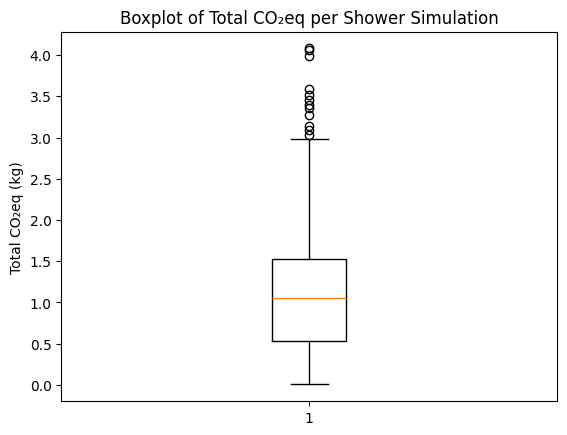

In [ ]:
# Boxplot
plt.figure()
plt.boxplot(results["total_CO2eq"], vert=True)
plt.ylabel("Total CO₂eq (kg)")
plt.title("Boxplot of Total CO₂eq per Shower Simulation")
plt.show()


In [ ]:
results.shape

(1000, 7)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
